## Assignement 1

##### Mariam Saikodze (14934949)


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV

In [2]:
data_red = pd.read_csv("winequality-red.csv",delimiter=";")
data_white = pd.read_csv("winequality-white.csv",delimiter=";")

In [3]:
print(f"Red wine dataset dimension: {data_red.shape}")
print(f"White wine dataset dimension: {data_white.shape}")

Red wine dataset dimension: (1599, 12)
White wine dataset dimension: (4898, 12)


In [4]:
data_red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
# Ensure both datasets have the same feature variables
assert data_red.columns.tolist() == data_white.columns.tolist(), \
    "The datasets have different feature columns!"

In [6]:
# Dataset Info
print("Red Wine Data Info:")
data_red.info()

Red Wine Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
print("White Wine Data Info:")
data_white.info()

White Wine Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


#### Based on the provided information, the feature types for both the red and white wine datasets are already presented in the correct data types for analysis.

In [8]:
print("\nRed Wine Summary:")
print(data_red.describe())

print("\nWhite Wine Summary:")
print(data_white.describe())


Red Wine Summary:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000           

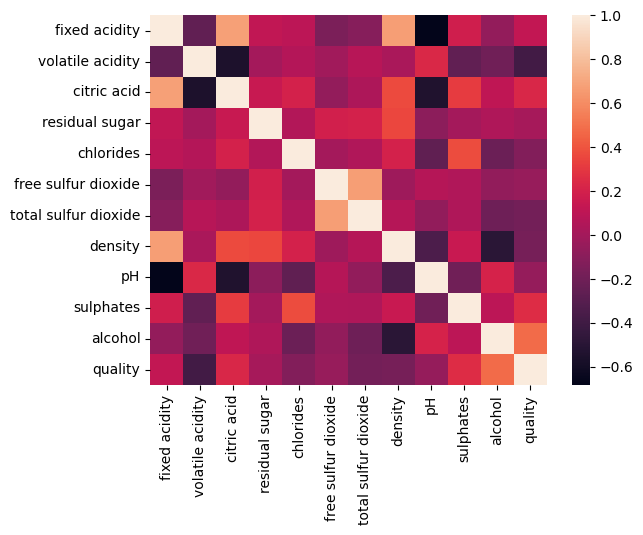

In [9]:
# Calculate the correlation matrix for the red wine dataset
correlation = sns.heatmap(data_red.corr())

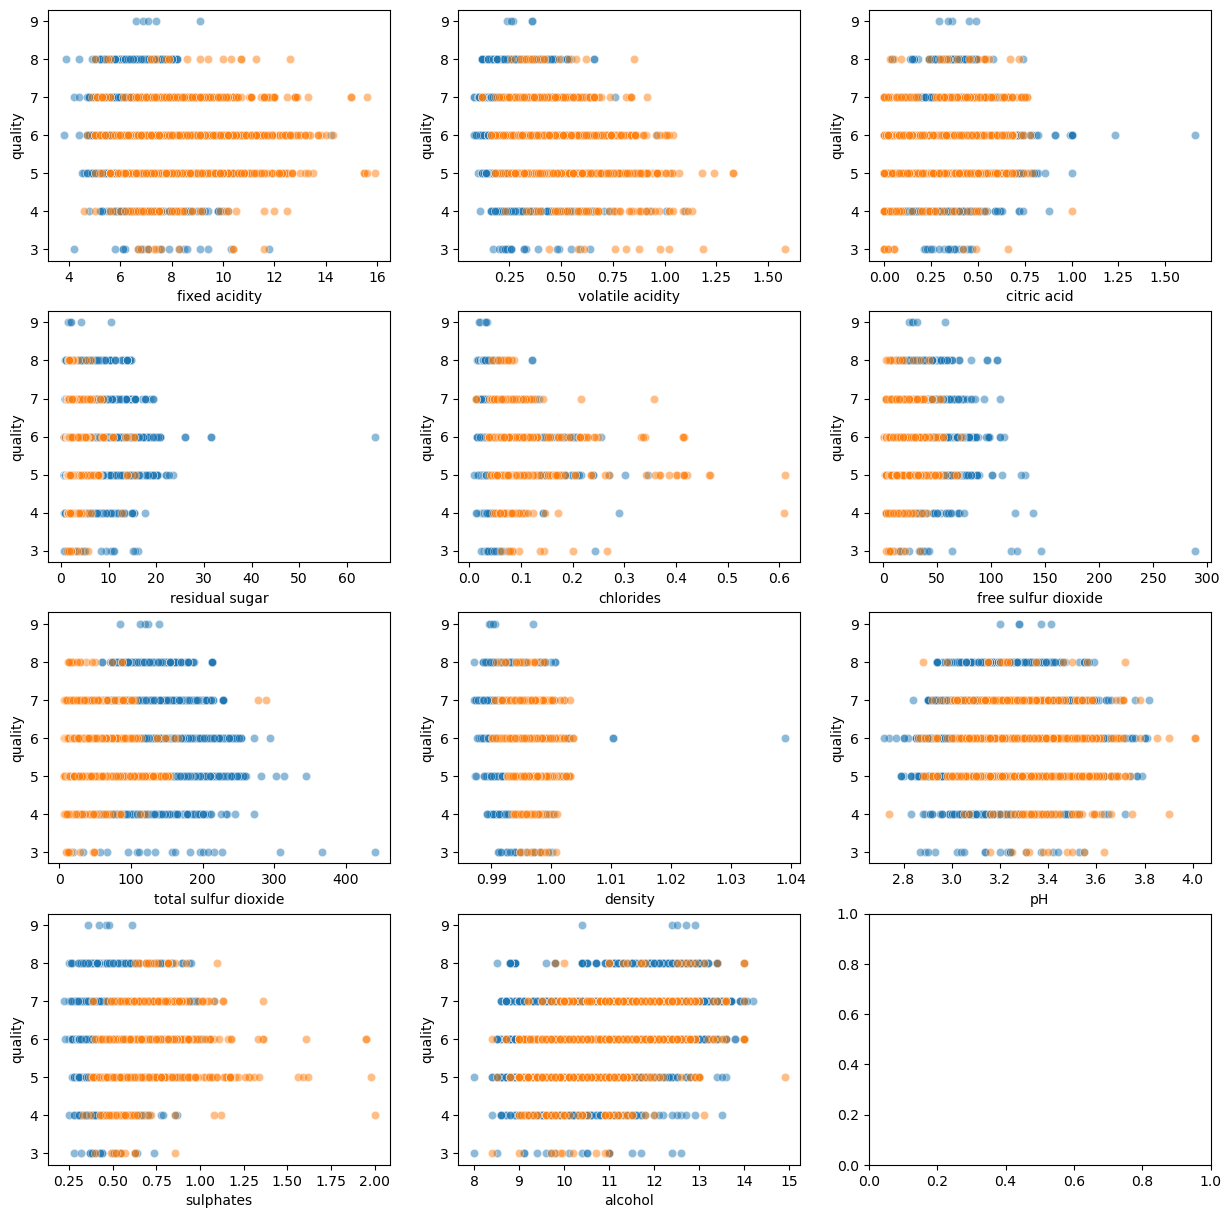

In [10]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15))  
axes = axes.flatten()

for i, feature in enumerate(data_white.columns[:-1]):  
    sns.scatterplot(data=data_white, x=feature, y='quality', ax=axes[i], alpha=0.5)

for i, feature in enumerate(data_red.columns[:-1]):  
    sns.scatterplot(data=data_red, x=feature, y='quality', ax=axes[i], alpha=0.5)
    

plt.show()

# Visualize the relationship between each feature and the target variable ('quality') in both the 
# red and white wine datasets.

#
Calculated the correlation of each feature with the target variable ('quality') for both red and white wine datasets. This helps us to compare the strength and direction of feature-quality relationships in both datasets

In [11]:
corr_red = data_red.corr()['quality'][:-1].sort_values(ascending=False)
corr_white = data_white.corr()['quality'][:-1].sort_values(ascending=False)

# combine the correlation results 
merged_corr = pd.DataFrame({
    'Red Wine Correlation': corr_red,
    'White Wine Correlation': corr_white
})

print(merged_corr)

                      Red Wine Correlation  White Wine Correlation
alcohol                           0.476166                0.435575
chlorides                        -0.128907               -0.209934
citric acid                       0.226373               -0.009209
density                          -0.174919               -0.307123
fixed acidity                     0.124052               -0.113663
free sulfur dioxide              -0.050656                0.008158
pH                               -0.057731                0.099427
residual sugar                    0.013732               -0.097577
sulphates                         0.251397                0.053678
total sulfur dioxide             -0.185100               -0.174737
volatile acidity                 -0.390558               -0.194723


In [12]:
from sklearn.metrics.pairwise import cosine_similarity

correlations_red= data_red.corr()['quality'][:-1]  
correlations_white = data_white.corr()['quality'][:-1]
cosine_sim = cosine_similarity([correlations_red.values], [correlations_white.values])[0, 0]

# Cosine Similarity between correlation vectors per feature in each dataset
print(f"Cosine Similarity: {cosine_sim}")  

Cosine Similarity: 0.7611398500340593


#### Consclusion about Dataset similarity 

Both datasets show a similar trend in terms of how features correlate with wine quality, with alcohol being the most positively correlated feature in both red and white wine datasets. However, the exact strength of correlations differs between the datasets. Some features such as citric acid, chlorides, and density exhibit different levels of correlation between the two datasets, indicating that these features might influence the quality of red and white wine differently.
A cosine similarity of 0.76 means there is a significant overlap in the correlation patterns between the two wine types, although some variations in the specific correlations of features exist.

In summary, while there are similarities in the features' correlations with wine quality across the two datasets, specific features may have a different degree of influence on red and white wines. Therefore,we can not unify these datasets without considering the wine type, as doing so would risk overlooking these distinct influences. 

#### To preserve the information about which rows belong to red or white wine while combining the datasets, we will add a new column to each dataset that indicates the wine type.

In [13]:
# COMBINE DATASETS IN A VALID WAY 

# Inside each dataset add column that will indicate whether wine is red or white
data_red['red'] = 1
data_white['red'] = 0

data = pd.concat([data_red, data_white], ignore_index=True)
print(data.shape)

(6497, 13)


#

## 2. Closed-form OLS Solution

In [14]:
from sklearn.datasets import make_regression

In [15]:
X, y, coeffs = make_regression(n_samples=500, n_features=10, noise=0.1, coef=True)

In [16]:
Betas = np.linalg.inv(X.T @ X) @ X.T @y

In [17]:
print("True coefficients:\n", coeffs)
print("Closed-form coefficients:\n", Betas)

True coefficients:
 [48.74187085  8.33578837 23.66659409  6.62672818 32.89554616 57.57898869
 52.372283   33.14379833 40.26433175 42.91405675]
Closed-form coefficients:
 [48.7421054   8.32930385 23.67215425  6.62239086 32.89125916 57.57653243
 52.36907578 33.14391155 40.2669743  42.9141679 ]


### Shortcoming of the closed-form approach

The closed-form solution indeed yields the actual coefficients of the linear regression model.

However,it's inefficient for building regression models due to high memory and time costs.

Storing X.T @ X requires computing and storing alarge matrix, which becomes memory-intensive when 
X is large. Additionally, calculating the inverse of this big matrix is computationally expensive.
It’s also important to note that both time and space complexities increase polynomially,
meaning as the dataset size grows, the computational cost increases significantly.

#
#

## 3. Wine Quality Regression

### OLS Regression

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [19]:
X = data.drop(["quality"], axis=1)
y = data["quality"]
x_train, x_test, y_train, y_test = skl.model_selection.train_test_split(X, y, test_size=0.2)

In [20]:
model = LinearRegression()
model.fit(x_train, y_train)

scores = cross_val_score(model, x_train, y_train)
score = np.mean(scores)

# REALISTIC SCORE 
print(f"Croos Validation Score: {score}")

Croos Validation Score: 0.2922808142827556


#### Since the cross-validation score is somewhat low, let's try experimenting with the linear regression model.

Regression models typically produce continuous (real-number) predictions, but in this case, the target variable is restricted to integer values ranging from 0 to 10. 
To address this, we round the predicted values to the nearest integer and compute the cross-validation score based on these rounded predictions. 

The R² score is then calculated, which measures how well the rounded predictions match the true target values (which are also integers). 
This allows us to assess the model's performance using predictions that are more aligned with the integer-based nature of the target variable, rather than the raw continuous predictions.


In [21]:
from sklearn.metrics import make_scorer

def rounded_r2_score(y_true, y_pred):
    y_pred_rounded = np.round(y_pred)
    return r2_score(y_true, y_pred_rounded)

custom_scorer = make_scorer(rounded_r2_score)
scores = cross_val_score(model, x_train, y_train, cv=5, scoring=custom_scorer)  

print(f"Cross-Validation score after rounding: {np.mean(scores)}")


Cross-Validation score after rounding: 0.17064378430890098


In [22]:
y_pred = model.predict(x_test)
y_pred_rounded = np.round(y_pred)

mismatched_indices = np.where(y_pred_rounded != y_test)[0]
mismatched_actual = y_test.iloc[mismatched_indices]
mismatched_predicted = y_pred_rounded[mismatched_indices]

print("Mismatched Actual vs Predicted Values:")
for actual, predicted in zip(mismatched_actual, mismatched_predicted):
    print(f"Actual: {actual}, Predicted: {predicted}")

Mismatched Actual vs Predicted Values:
Actual: 4, Predicted: 6.0
Actual: 6, Predicted: 5.0
Actual: 4, Predicted: 5.0
Actual: 6, Predicted: 5.0
Actual: 7, Predicted: 6.0
Actual: 7, Predicted: 6.0
Actual: 8, Predicted: 6.0
Actual: 5, Predicted: 6.0
Actual: 6, Predicted: 7.0
Actual: 6, Predicted: 7.0
Actual: 5, Predicted: 6.0
Actual: 5, Predicted: 6.0
Actual: 6, Predicted: 5.0
Actual: 6, Predicted: 5.0
Actual: 6, Predicted: 5.0
Actual: 5, Predicted: 6.0
Actual: 7, Predicted: 6.0
Actual: 5, Predicted: 6.0
Actual: 6, Predicted: 7.0
Actual: 6, Predicted: 5.0
Actual: 7, Predicted: 6.0
Actual: 7, Predicted: 6.0
Actual: 5, Predicted: 6.0
Actual: 6, Predicted: 7.0
Actual: 7, Predicted: 6.0
Actual: 6, Predicted: 7.0
Actual: 5, Predicted: 6.0
Actual: 6, Predicted: 5.0
Actual: 4, Predicted: 6.0
Actual: 5, Predicted: 6.0
Actual: 7, Predicted: 6.0
Actual: 6, Predicted: 5.0
Actual: 7, Predicted: 6.0
Actual: 6, Predicted: 5.0
Actual: 6, Predicted: 7.0
Actual: 5, Predicted: 6.0
Actual: 5, Predicted: 6.0

### Why rounding cause worse results

In this case, rounding can introduce an increase in error when the predicted value is closer to a higher 
integer but differs from the actual value. Rounding can introduce errors that increase the difference 
between the predicted and actual values, thereby reducing the cross-validation score, 
especially when predictions are rounded in the wrong direction. Therefore, rounding does not improve the model's performance.



### Results for OLS model

In [23]:
score = model.score(x_test, y_test)
print(f"Test score: {score}")

Test score: 0.2884665248979966


In [24]:
y_pred = model.predict(x_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R_2: {r2}")

Mean Squared Error: 0.5327739517929598
Mean Absolute Error: 0.5715872065763741
R_2: 0.2884665248979966


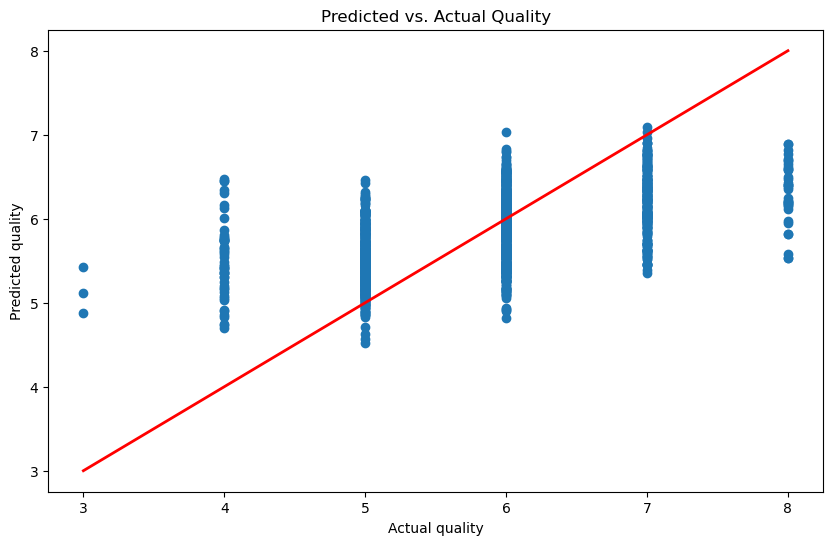

In [27]:
# Plot the predicted values against the actual values

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')
plt.title('Predicted vs. Actual Quality')
plt.show()

#

#
### RIDGE Regression

In [28]:
# FIND ALPHA PARAMETER using grid-searching

alpha_param_grid = {'alpha': np.logspace(-10, 10, 50)}  
grid = GridSearchCV(Ridge(), alpha_param_grid, return_train_score=True, cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-10, 2.55954792e-10, 6.55128557e-10, 1.67683294e-09,
       4.29193426e-09, 1.09854114e-08, 2.81176870e-08, 7.19685673e-08,
       1.84206997e-07, 4.71486636e-07, 1.20679264e-06, 3.08884360e-06,
       7.90604321e-06, 2.02358965e-05, 5.17947468e-05, 1.32571137e-04,
       3.39322177e-04, 8.68511374e-04, 2.22299648e-03, 5....
       2.68269580e+01, 6.86648845e+01, 1.75751062e+02, 4.49843267e+02,
       1.15139540e+03, 2.94705170e+03, 7.54312006e+03, 1.93069773e+04,
       4.94171336e+04, 1.26485522e+05, 3.23745754e+05, 8.28642773e+05,
       2.12095089e+06, 5.42867544e+06, 1.38949549e+07, 3.55648031e+07,
       9.10298178e+07, 2.32995181e+08, 5.96362332e+08, 1.52641797e+09,
       3.90693994e+09, 1.00000000e+10])},
             return_train_score=True)

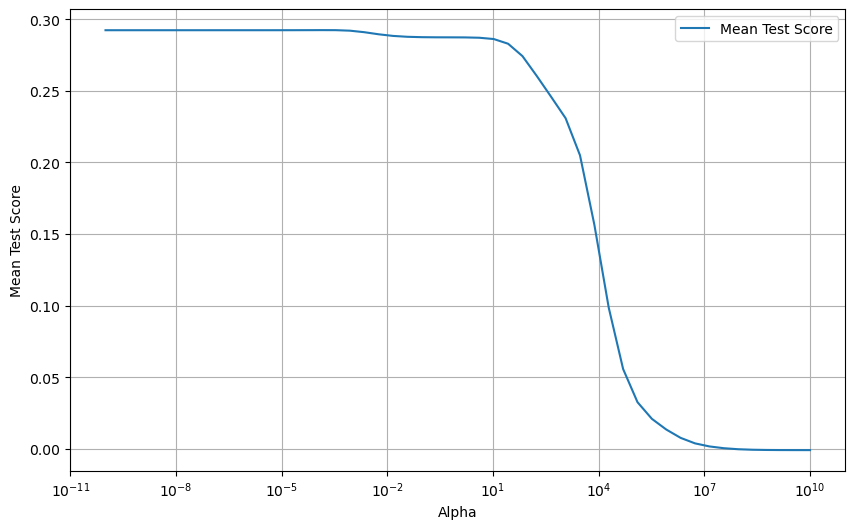

In [29]:
results = grid.cv_results_
alphas = results['param_alpha'].data

mean_test_scores = results['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(alphas, mean_test_scores, label='Mean Test Score')
plt.xscale('log')  
plt.xlabel('Alpha')
plt.ylabel('Mean Test Score')
plt.grid(True)
plt.legend()
plt.show()

Since the best alpha score is extremely close to 0, the penalty applied by Ridge regression is very weak, making the model behave almost identically to standard linear regression, where no regularization is applied. This suggests that Ridge regression is not adding significant value in this case, as the regularization is too weak to affect the model's performance.

In [30]:
best_alpha = grid.best_params_['alpha']
ridge_model = grid.best_estimator_
ridge_scores = grid.best_score_

print(f"Best Alpha: {best_alpha}")
print(f"Score: {np.mean(ridge_scores)}")

Best Alpha: 0.0001325711365590111
Score: 0.2923487695215147


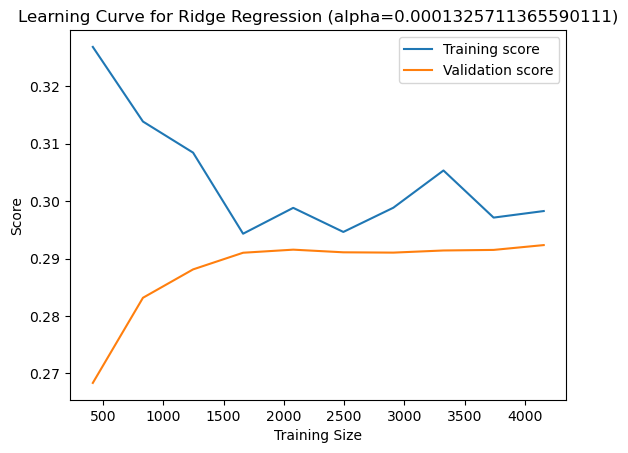

In [31]:
# Learning Cyrve for Ridge

from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    ridge_model, x_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, val_mean, label="Validation score")


plt.xlabel("Training Size")
plt.ylabel("Score")
plt.title(f"Learning Curve for Ridge Regression (alpha={best_alpha})")
plt.legend()
plt.show()


In [32]:
ridge_model.score(x_test, y_test)

0.2883069361975499

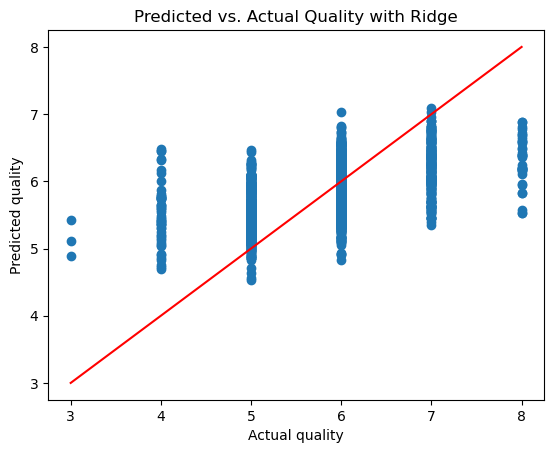

In [33]:
y_pred_ridge = ridge_model.predict(x_test)

plt.figure()
plt.scatter(y_test, y_pred_ridge, label='Ridge Model Predictions')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red') 
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')
plt.title('Predicted vs. Actual Quality with Ridge')
plt.show()









### Lasso

In [34]:
grid_lasso= GridSearchCV(Lasso(), alpha_param_grid, cv = 5)
grid_lasso.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-10, 2.55954792e-10, 6.55128557e-10, 1.67683294e-09,
       4.29193426e-09, 1.09854114e-08, 2.81176870e-08, 7.19685673e-08,
       1.84206997e-07, 4.71486636e-07, 1.20679264e-06, 3.08884360e-06,
       7.90604321e-06, 2.02358965e-05, 5.17947468e-05, 1.32571137e-04,
       3.39322177e-04, 8.68511374e-04, 2.22299648e-03, 5....
       6.25055193e-01, 1.59985872e+00, 4.09491506e+00, 1.04811313e+01,
       2.68269580e+01, 6.86648845e+01, 1.75751062e+02, 4.49843267e+02,
       1.15139540e+03, 2.94705170e+03, 7.54312006e+03, 1.93069773e+04,
       4.94171336e+04, 1.26485522e+05, 3.23745754e+05, 8.28642773e+05,
       2.12095089e+06, 5.42867544e+06, 1.38949549e+07, 3.55648031e+07,
       9.10298178e+07, 2.32995181e+08, 5.96362332e+08, 1.52641797e+09,
       3.90693994e+09, 1.00000000e+10])})

In [35]:
lasso_model = grid_lasso.best_estimator_
best_lasso_alpha = grid_lasso.best_params_['alpha']
best_lasso_score = grid_lasso.best_score_

print(f"Best alpha value: {best_lasso_alpha}")
print(f"Cross validation score: {(best_lasso_score)}")

Best alpha value: 3.088843596477485e-06
Cross validation score: 0.29232393551827485


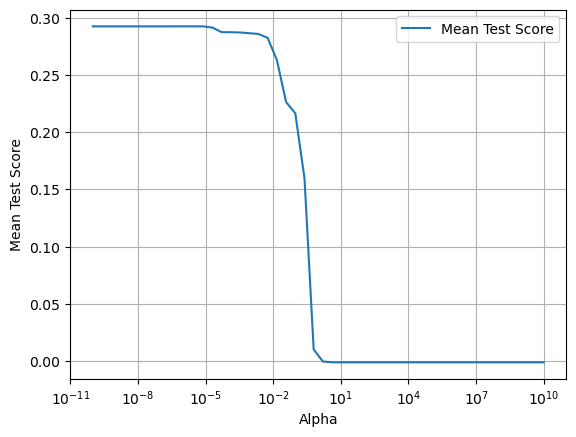

In [36]:
results = grid_lasso.cv_results_
alphas = results['param_alpha'].data

mean_test_scores = results['mean_test_score']
plt.figure()
plt.plot(alphas, mean_test_scores, label='Mean Test Score')
plt.xscale('log')  
plt.xlabel('Alpha')
plt.ylabel('Mean Test Score')
plt.grid(True)
plt.legend()
plt.show()

In [37]:
lasso_model.score(x_test, y_test)

0.28825549882253376

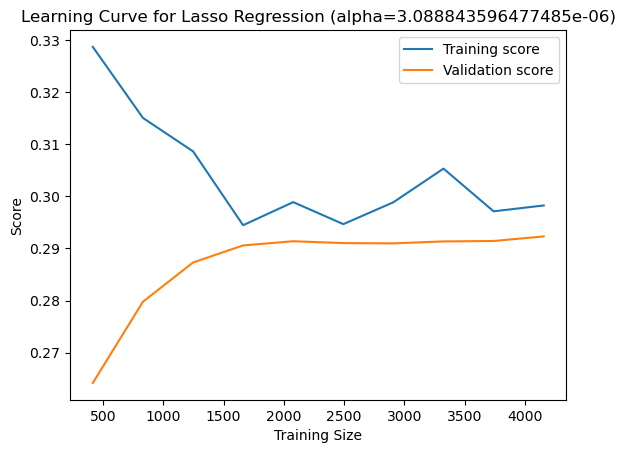

In [38]:
# Learning Curve for Lasso

train_sizes, train_scores, val_scores = learning_curve(
    lasso_model, x_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, val_mean, label="Validation score")

plt.xlabel("Training Size")
plt.ylabel("Score")
plt.title(f"Learning Curve for Lasso Regression (alpha={best_lasso_alpha})")
plt.legend()
plt.show()

#

### ELASTIC NET

In [39]:
from sklearn.linear_model import ElasticNet

In [40]:
param_grid = {
   'alpha': np.logspace(-10, 10, 50),
    'l1_ratio': [0.1, 0.5, 0.9]  
}

In [41]:
grid_elastic_net= GridSearchCV(ElasticNet(), param_grid, cv = 5)
grid_elastic_net.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': array([1.00000000e-10, 2.55954792e-10, 6.55128557e-10, 1.67683294e-09,
       4.29193426e-09, 1.09854114e-08, 2.81176870e-08, 7.19685673e-08,
       1.84206997e-07, 4.71486636e-07, 1.20679264e-06, 3.08884360e-06,
       7.90604321e-06, 2.02358965e-05, 5.17947468e-05, 1.32571137e-04,
       3.39322177e-04, 8.68511374e-04, 2.22299648e-...
       2.68269580e+01, 6.86648845e+01, 1.75751062e+02, 4.49843267e+02,
       1.15139540e+03, 2.94705170e+03, 7.54312006e+03, 1.93069773e+04,
       4.94171336e+04, 1.26485522e+05, 3.23745754e+05, 8.28642773e+05,
       2.12095089e+06, 5.42867544e+06, 1.38949549e+07, 3.55648031e+07,
       9.10298178e+07, 2.32995181e+08, 5.96362332e+08, 1.52641797e+09,
       3.90693994e+09, 1.00000000e+10]),
                         'l1_ratio': [0.1, 0.5, 0.9]})

In [42]:
print("Best alpha:", grid_elastic_net.best_params_['alpha'])
print("Best l1_ratio:", grid_elastic_net.best_params_['l1_ratio'])

Best alpha: 7.196856730011529e-08
Best l1_ratio: 0.5


In [43]:
elastic_net_model = grid_elastic_net.best_estimator_

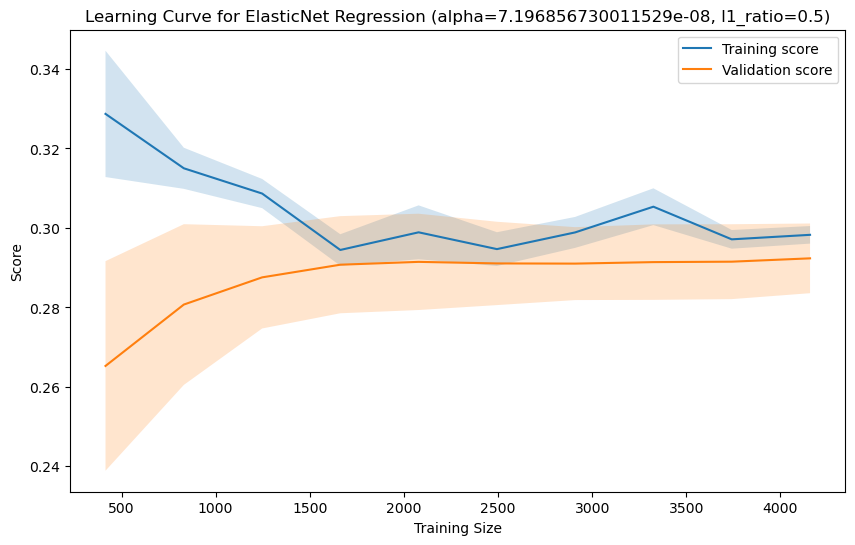

In [44]:
train_sizes, train_scores, val_scores = learning_curve(
    elastic_net_model, x_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))


train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_std = np.std(val_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, val_mean, label="Validation score")


plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)


plt.xlabel("Training Size")
plt.ylabel("Score")
plt.title(f"Learning Curve for ElasticNet Regression (alpha={grid_elastic_net.best_params_['alpha']}, 
          l1_ratio={grid_elastic_net.best_params_['l1_ratio']})")
plt.legend()
plt.show()